<a href="https://colab.research.google.com/github/surajjorwar/Decision-Tree/blob/main/Decision_Tree.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Traning and visualizing a Decision Tree

In [134]:
#importing DecisionTreeClassifier and iris data sets from sklearn
from sklearn.tree import DecisionTreeClassifier
from sklearn.datasets import load_iris
from sklearn import tree
import pandas as pd
import numpy as np
from sklearn.tree import export_text





In [135]:
iris  = load_iris()

In [136]:
X = iris.data[:,2:] # petal length and width

In [137]:
print(X[0:2]) #first 2 element of our data

[[1.4 0.2]
 [1.4 0.2]]


In [138]:
y = iris.target

In [139]:
print(y[0:2]) #first 2 element of our data

[0 0]


In [140]:
clf = DecisionTreeClassifier(max_depth = 2 ) # creating  Decision tree object
clf.fit(X,y)  # training the algorithm

DecisionTreeClassifier(max_depth=2)

visualizing the trained Decision Tree by first using the export_graphviz()
method to output a graph definition file called iris_tree.dot:

In [141]:
tree_text = export_text(clf, feature_names=iris.feature_names[2:], show_weights=True)
print(tree_text) #stores the textual representation of the Decision Tree.


|--- petal length (cm) <= 2.45
|   |--- weights: [50.00, 0.00, 0.00] class: 0
|--- petal length (cm) >  2.45
|   |--- petal width (cm) <= 1.75
|   |   |--- weights: [0.00, 49.00, 5.00] class: 1
|   |--- petal width (cm) >  1.75
|   |   |--- weights: [0.00, 1.00, 45.00] class: 2



In [142]:
import graphviz #used for creating and rendering graphs,

dot_data = tree.export_graphviz(
    clf, out_file=None,
    feature_names=iris.feature_names[2:], class_names=iris.target_names,
    filled=True, rounded=True, special_characters=True
)
#"render" refers to the process of generating a graphical output or visual representation from the structured data or instructions

graph = graphviz.Source(dot_data)#source is used to process the DOT format data and prepare it for rendering as a graph.
graph.format = 'png'
img = graph.render("iris_decision_tree", view=True)  # Saves the visualization as 'iris_decision_tree.pdf' and opens it.

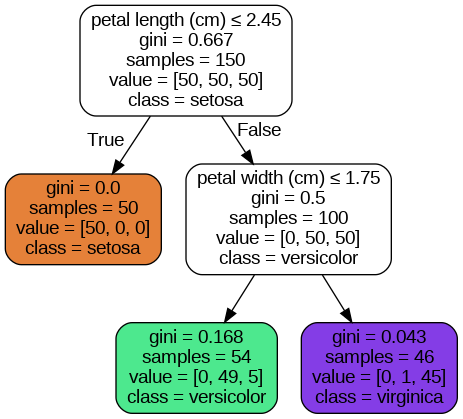

In [143]:
from IPython.display import Image # displays the image
Image(img)